In [1]:
# SH-I

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image as Image_

In [3]:
from fastai.vision import *

In [4]:
class_dict = {'background':0.0,
                'five':5.0,
                'four':4.0,
                'half':0.5,
                'half_half':1.0,
                'one':1.0,
                'one_half':1.5,
                'three':3.0,
                'three_half':3.5,
                'two':2.0,
                'two_half':2.5}

In [5]:
def count(img, learn):
    pred_class,pred_idx,outputs = learn.predict(img)
    return class_dict[str(pred_class)]

In [6]:
def miscount(matrix):
    n_len, m_len = matrix.shape
    e_list = []

    for n in range(n_len):
        for m in range(m_len):
            try:
                if not 0.5 in (matrix[n-1, m], matrix[n, m+1], matrix[n+1, m], matrix[n, m-1]) and matrix[n, m] == 0.5:
                    e_list.append(0.5)
            except:
                pass
    return e_list

In [7]:
def segment(arr, n, m, p=60):
    
    i_y = np.arange(arr.shape[0] // p) * p
    i_x = np.arange(arr.shape[1] // p) * p
    
    y = i_y[n]
    x = i_x[m]
    
    return arr[y:y+p, x:x+p, :]

def dim(arr, p=60):
    
    i_y = np.arange(arr.shape[0] // p) * p
    i_x = np.arange(arr.shape[1] // p) * p
    
    return len(i_y), len(i_x)

In [8]:
def iter_count(learn):

    i_list = []

    for n in range(len_n):

        for m in range(len_m):

            seg = segment(arr, n, m)
            img = Image(pil2tensor(seg,np.float32).div_(255))
            i = count(img, learn)
            i_list.append(i)
    
    return i_list

In [16]:
def plot(learn, colour, cmap):
    
    i_list = iter_count(learn)
    count = int(np.array(i_list).sum())
    matrix = np.array(i_list).reshape(dim(arr))
    plt.imshow(matrix, cmap=cmap)
    plt.axis('off')
    plt.title(colour + ' Plaques: ' + str(count))
    plt.show()

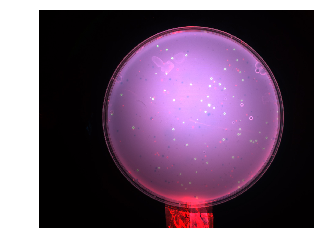

In [20]:
img = Image_.open('test.jpg')
arr = np.array(img)
len_n, len_m = dim(arr)
plt.imshow(arr)
plt.axis('off')
plt.show()

In [12]:
path = Path('./models/')
learn_green = load_learner(path, 'resnet18_green.pkl')
learn_blue = load_learner(path, 'resnet18_blue.pkl')

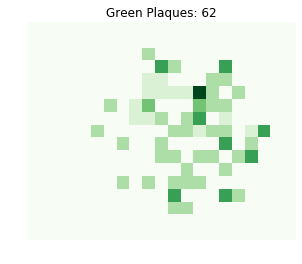

In [17]:
plot(learn_green, 'Green', 'Greens')

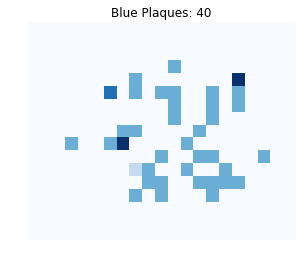

In [19]:
plot(learn_blue, 'Blue', 'Blues')